# CSC 442 Homework 6 - Alex Creech
For this exploratory data analysis, my query was based on how a CEO's base salary is related to a company's tax and revenue factors. As such, the independent variables of analysis will be `salary`, while dependent variables will consist of `revt`, `txc`, `txdb`, `txdi`, `txdc`, `txt`, `Total Income Taxes as % if pretax income`, `Total Deferred Taxes as % of pretax income`, and `Total Income Deferred Taxes as % of total assets`

In [173]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/causeyca21/CSC442Group/refs/heads/main/merged_data.csv") #Import merged dataset from GitHub

In [174]:
req_cols = ["gvkey", "tic", "state", "ticker", "co_per_rol", "pceo"] # Required Columns
important_cols = ["revt", "txc", "txdb", "txdi", "txdc", "txt", "Total Income Taxes as % of pretax income",
                  "Total Income Deferred Taxes as % of pretax income", "Total Income Deferred Taxes as % of total assets"] # Dependent Variables
my_cols = ["salary"] # Independent Variable

In [175]:
all_cols = req_cols + important_cols + my_cols
all_cols # All columns used in analysis

['gvkey',
 'tic',
 'state',
 'ticker',
 'co_per_rol',
 'pceo',
 'revt',
 'txc',
 'txdb',
 'txdi',
 'txdc',
 'txt',
 'Total Income Taxes as % of pretax income',
 'Total Income Deferred Taxes as % of pretax income',
 'Total Income Deferred Taxes as % of total assets',
 'salary']

First, I narrowed down the columns I wished to include in my analysis, focusing on salary and tax or revenue factors. I then took these columns and queried the dataset to retrieve only the data for the important columns. I also timed this query and retrieved statistics about the resulting dataset such as number of rows and number of columns.

In [176]:
import time
start_time = time.time()
baseSalaryData = data[all_cols]
end_time = time.time()

print("Time to execute query:", end_time - start_time, "seconds")
print("Number of Rows:", len(baseSalaryData))
print("Number of Columns:", len(baseSalaryData.columns))

Time to execute query: 0.0016782283782958984 seconds
Number of Rows: 1152
Number of Columns: 16


In [177]:
baseSalaryData.head()

,gvkey,tic,state,ticker,co_per_rol,pceo,revt,txc,txdb,txdi,txdc,txt,Total Income Taxes as % of pretax income,Total Income Deferred Taxes as % of pretax income,Total Income Deferred Taxes as % of total assets,salary
0,1004,AIR,Illinois,AIR,51547,CEO,1990.600,33.600,33.60,-2.200,-2.200,31.400,0.259076,-0.018152,-0.001200,1050.000
1,1075,PNW,Arizona,PNW,61549,CEO,4695.991,24.126,2416.48,52.786,52.755,76.912,0.129113,0.088561,0.002139,1125.000
2,1161,AMD,California,AMD,46953,CEO,22680.000,673.000,1202.00,-1019.000,-1019.000,-346.000,-0.681102,-2.005906,-0.015011,1200.000
3,1209,APD,Pennsylvania,APD,49820,CEO,12600.000,575.900,1266.00,-24.700,-24.700,551.200,0.191230,-0.008569,-0.000772,1350.000
4,1230,ALK,Washington,ALK,40103,CEO,10426.000,-7.000,695.00,95.000,81.000,88.000,0.272446,0.250774,0.005543,637.692


In [178]:
baseSalaryData.describe()

,gvkey,co_per_rol,revt,txc,txdb,txdi,txdc,txt,Total Income Taxes as % of pretax income,Total Income Deferred Taxes as % of pretax income,Total Income Deferred Taxes as % of total assets,salary
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,54572.414931,53991.670139,11700.748558,291.928968,661.104273,-61.902385,-56.378129,230.205627,0.194361,-0.007388,-0.004347,1000.857962
std,62806.565633,15576.132280,37424.957200,1182.333873,2880.310042,440.023283,437.869706,1051.426960,2.284329,2.861176,0.024585,444.936902
min,1004.000000,581.000000,0.000000,-484.000000,0.000000,-6349.000000,-6349.000000,-5001.000000,-32.937500,-38.205387,-0.397853,0.000000
25%,9437.500000,45836.250000,1002.057500,10.398000,2.251250,-34.769000,-32.475000,6.789500,0.110772,-0.087234,-0.008201,750.000000
50%,25875.000000,56974.000000,2803.892500,46.974500,42.985500,-4.860000,-4.226500,43.100000,0.208466,-0.004511,-0.001748,980.769000
75%,65629.000000,66674.750000,7776.725000,178.046000,292.175000,6.579000,6.579500,161.694000,0.252199,0.064571,0.002149,1200.000000
max,328795.000000,73307.000000,608481.000000,23009.000000,58666.000000,2600.000000,3037.000000,16950.000000,64.023569,72.062500,0.266047,6504.039000


In [179]:
baseSalaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   gvkey                                              1152 non-null   int64  
 1   tic                                                1152 non-null   object 
 2   state                                              1152 non-null   object 
 3   ticker                                             1152 non-null   object 
 4   co_per_rol                                         1152 non-null   int64  
 5   pceo                                               1152 non-null   object 
 6   revt                                               1152 non-null   float64
 7   txc                                                1152 non-null   float64
 8   txdb                                               1152 non-null   float64
 9   txdi    

I then created a histogram to visualize the distribution of salary across CEOs. The distribution appears to be fairly symmetrical and unimodal, with only one potential outlier to the right.

<Axes: >

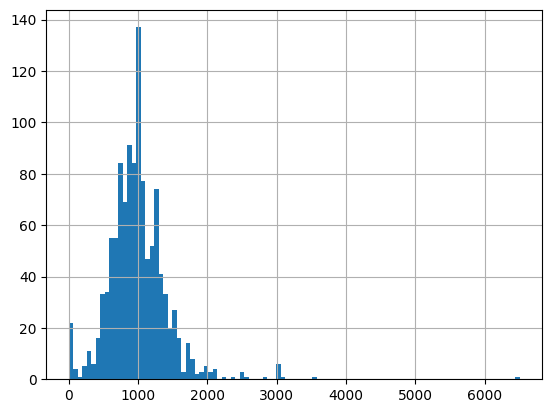

In [180]:
baseSalaryData["salary"].hist(bins=100)

To address any potential outliers, I will remove any data points that are more than 1.5 times the IQR above quartile 3 or less than 1.5 times the IQR below quartile 1.

In [181]:
IQR = baseSalaryData["salary"].quantile(.75) - baseSalaryData["salary"].quantile(.25)

baseSalaryData = baseSalaryData[(baseSalaryData["salary"] <= (1.5 * IQR + baseSalaryData["salary"].quantile(.75))) &
 (baseSalaryData["salary"] >= (baseSalaryData["salary"].quantile(.25) - 1.5 * IQR))]

I then checked the histogram again.

<Axes: >

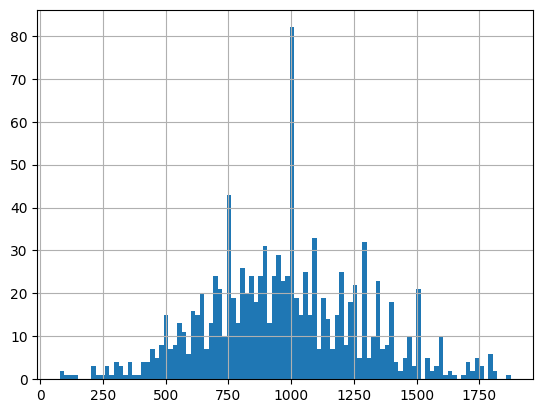

In [182]:
baseSalaryData["salary"].hist(bins=100)

After checking the distribution, I created scatterplots of salary vs all of the revenue and tax factors to check visually for any potential relationships.

<Axes: xlabel='salary', ylabel='Total Income Deferred Taxes as % of total assets'>

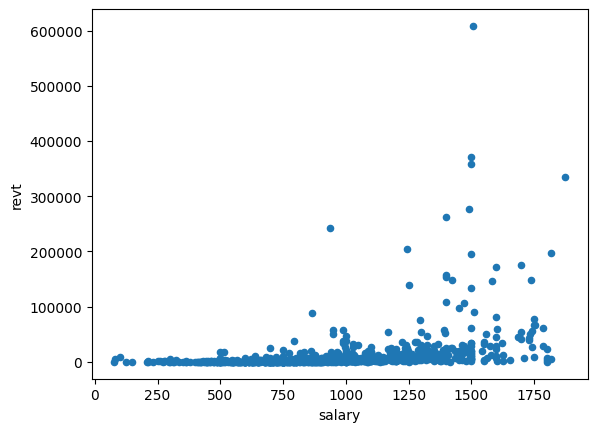

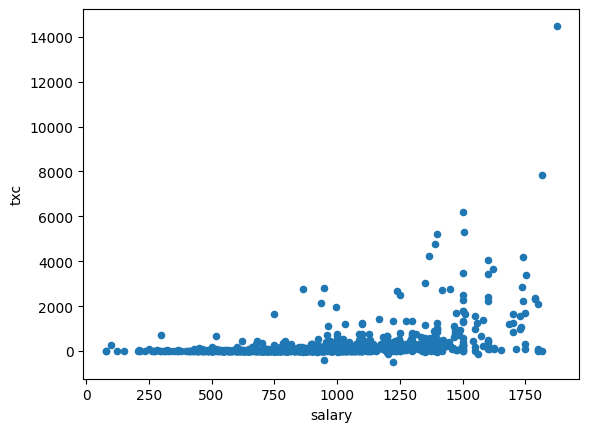

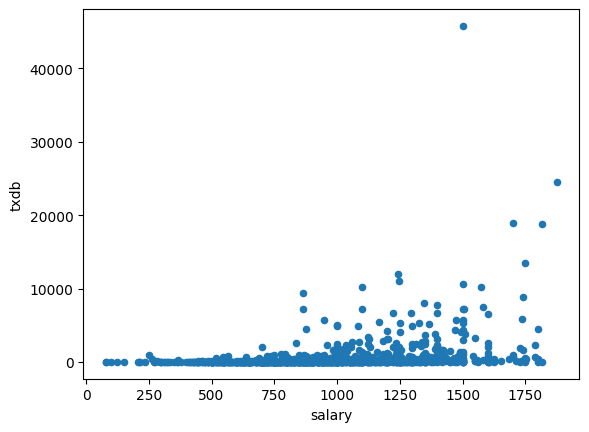

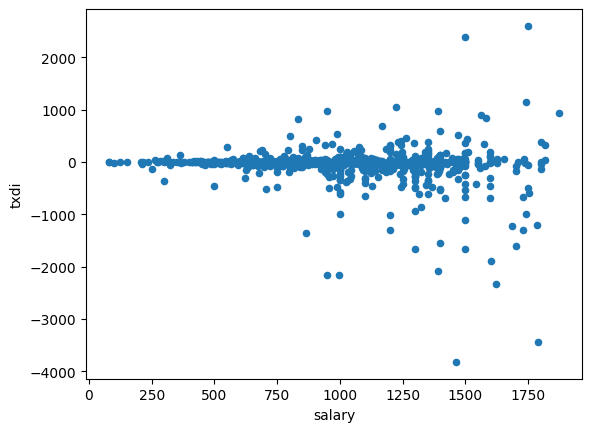

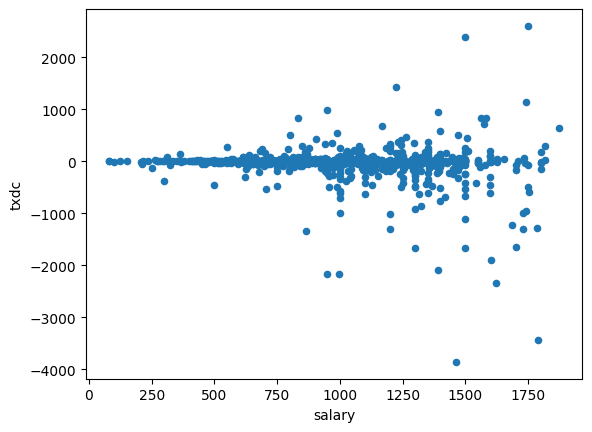

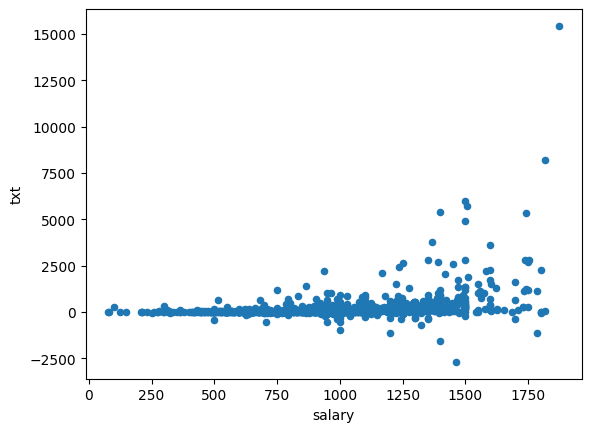

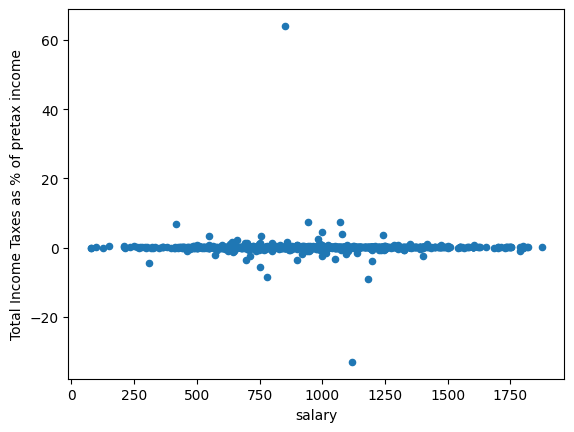

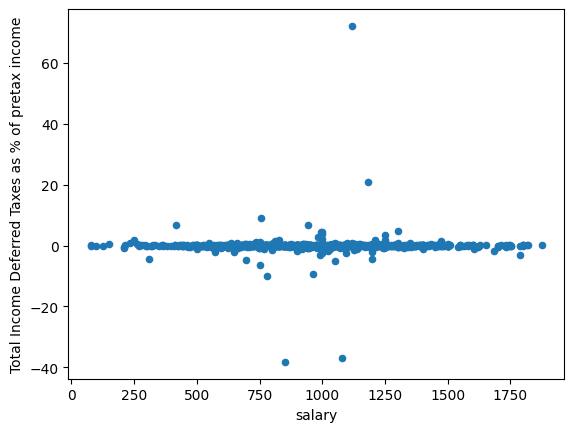

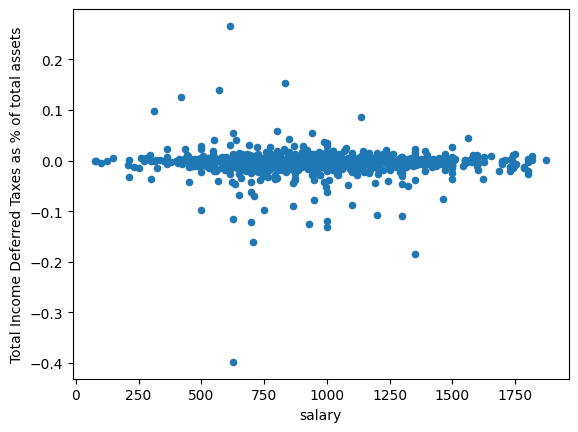

In [183]:
# Compare salary to effective tax rate
baseSalaryData.plot.scatter(x="salary", y="revt")
baseSalaryData.plot.scatter(x="salary", y="txc")
baseSalaryData.plot.scatter(x="salary", y="txdb")
baseSalaryData.plot.scatter(x="salary", y="txdi")
baseSalaryData.plot.scatter(x="salary", y="txdc")
baseSalaryData.plot.scatter(x="salary", y="txt")
baseSalaryData.plot.scatter(x="salary", y="Total Income Taxes as % of pretax income")
baseSalaryData.plot.scatter(x="salary", y="Total Income Deferred Taxes as % of pretax income")
baseSalaryData.plot.scatter(x="salary", y="Total Income Deferred Taxes as % of total assets")

I then repeated this step for every column in the table, resulting in a pairplot grid with scatterplots of every column against every other column. This grid revealed that for most column-column relationships, there is very little correlation.

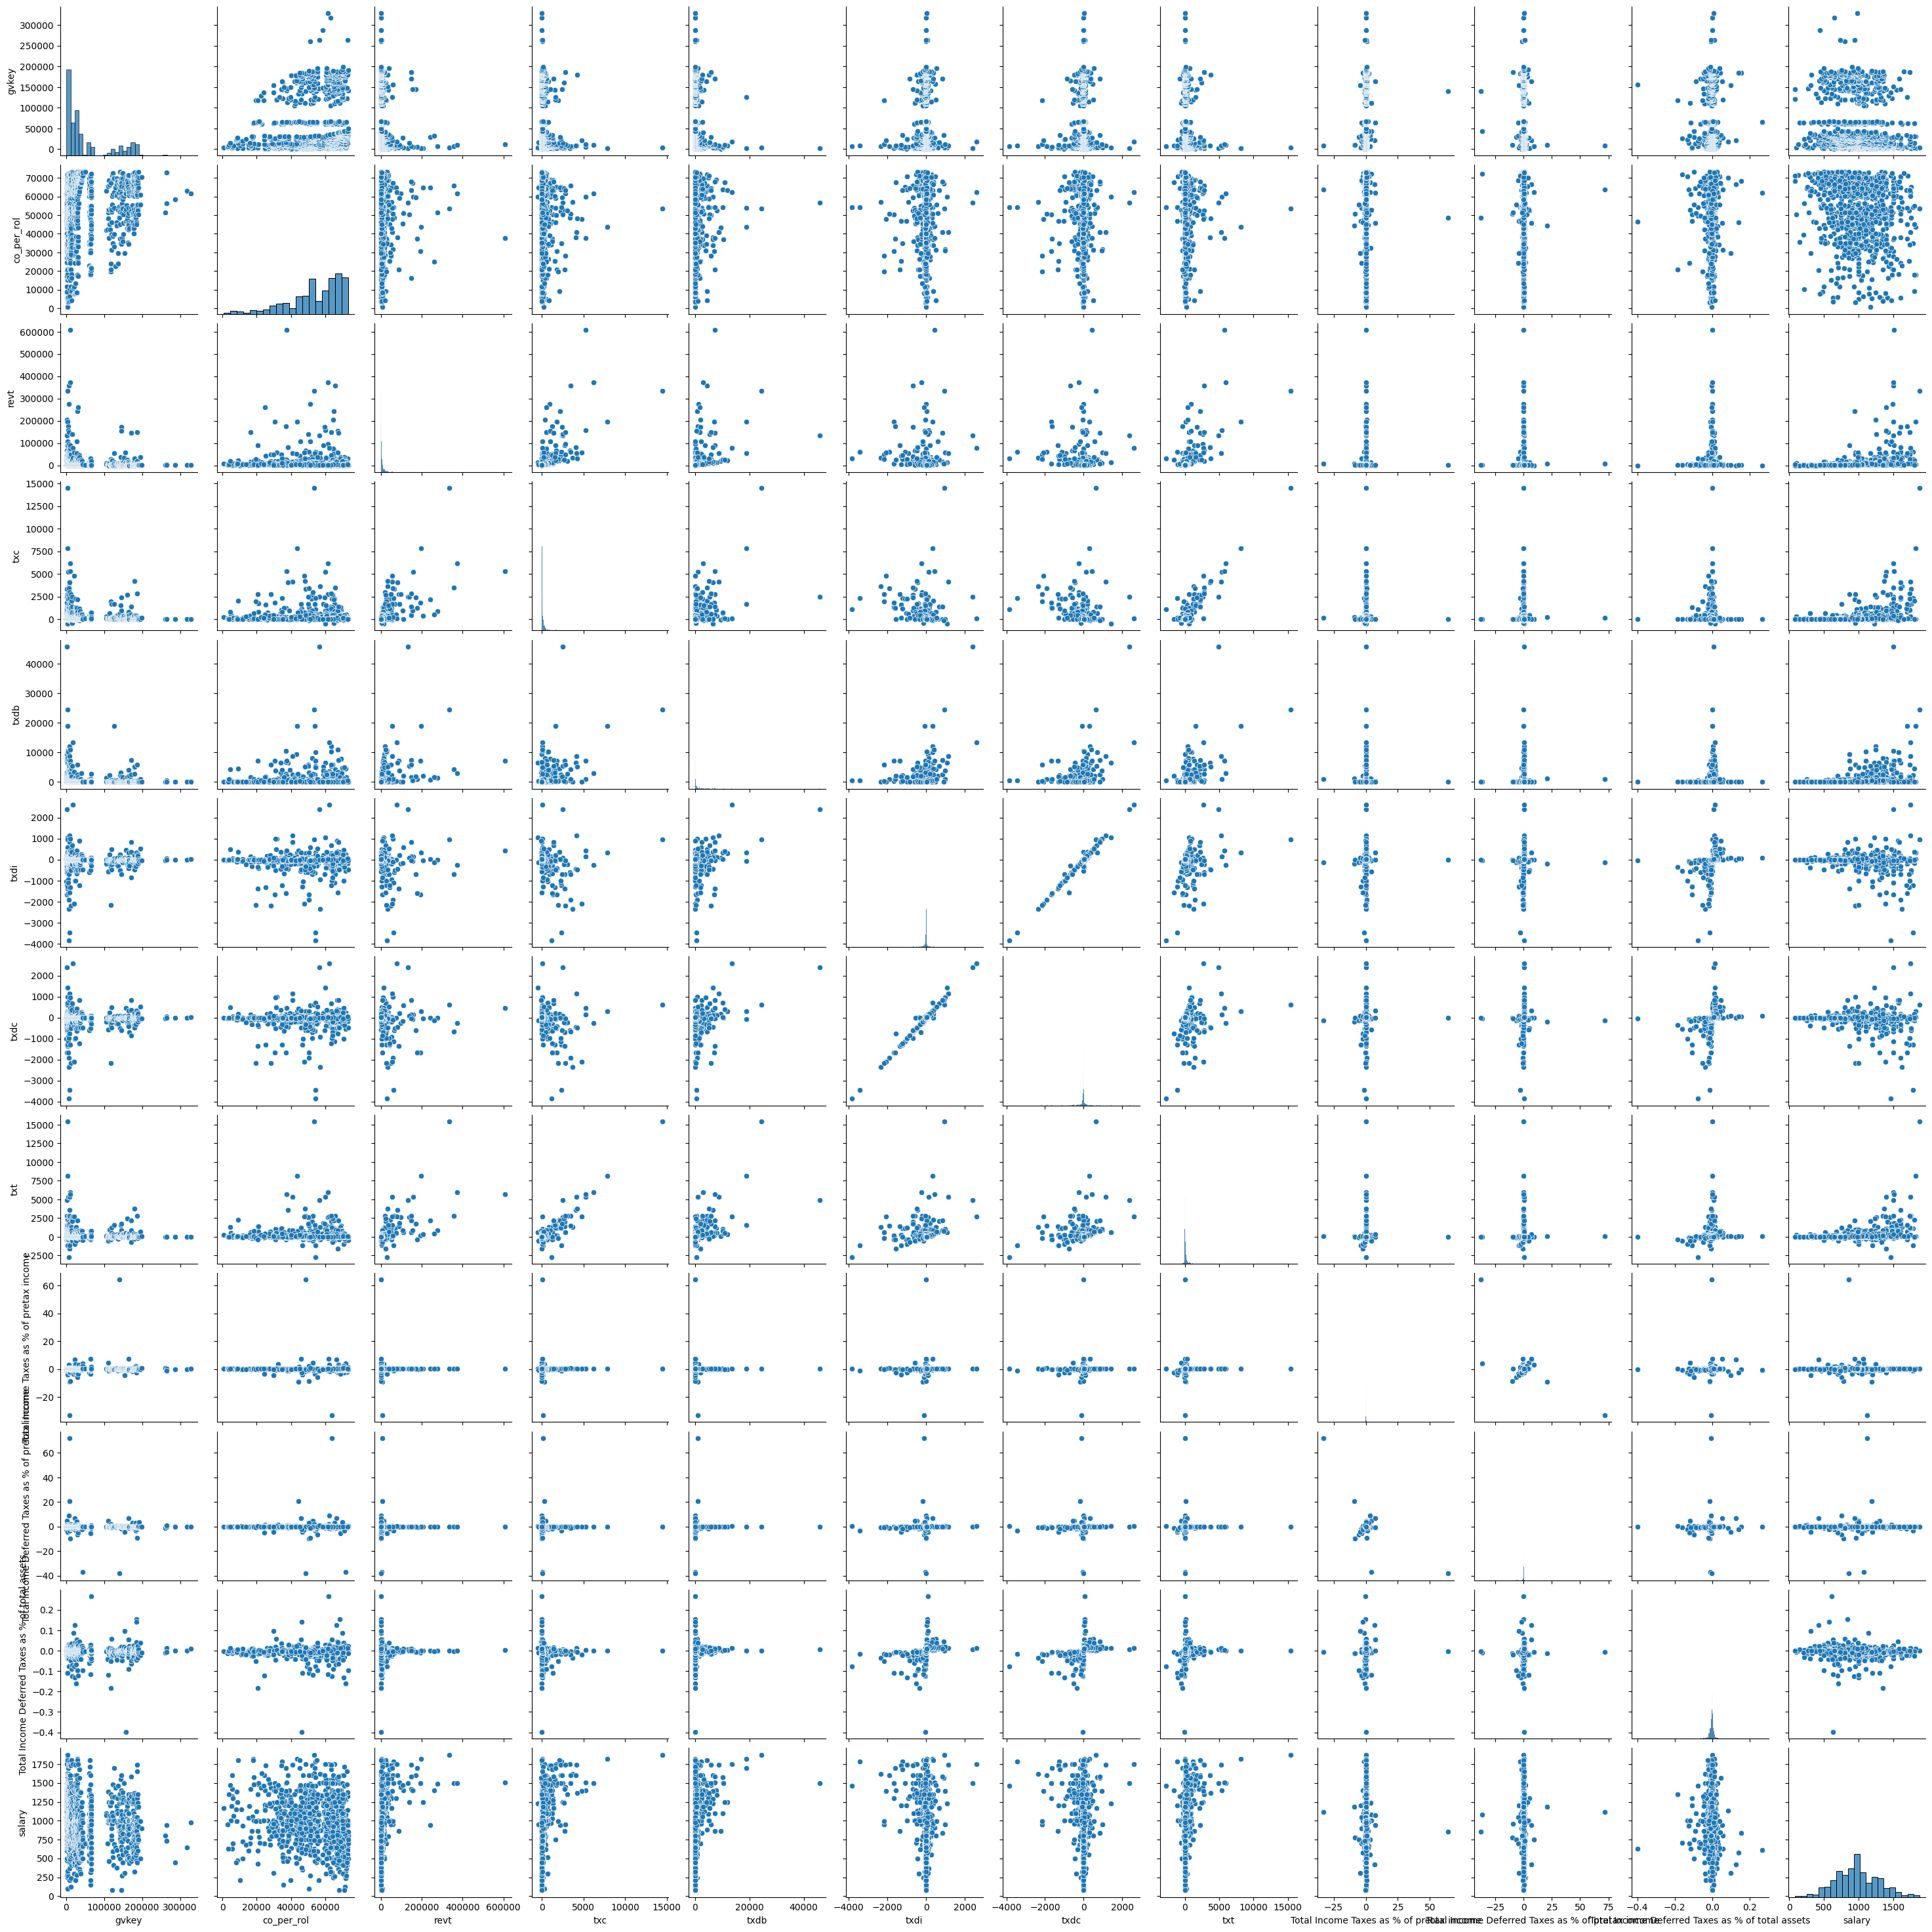

In [184]:
import seaborn as sns

sns.pairplot(baseSalaryData)

Similar to the scatterplots above, these plots plot one column (salary), against all of the dependent variables. These plots differ, however, in that these plots also draw the line of best-fit when fitting a linear regression model to the data. The mostly-flat lines indicate that there may not be much of a correlation between salary and any of these variables.

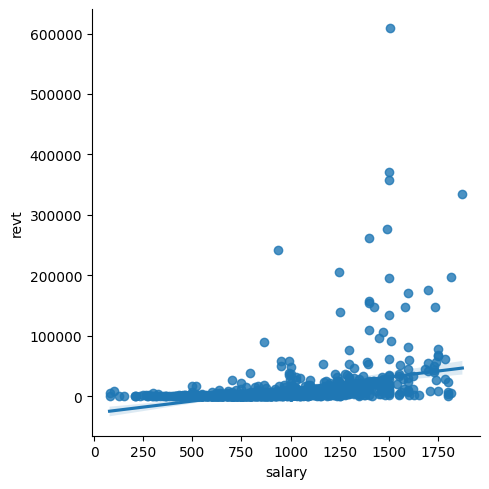

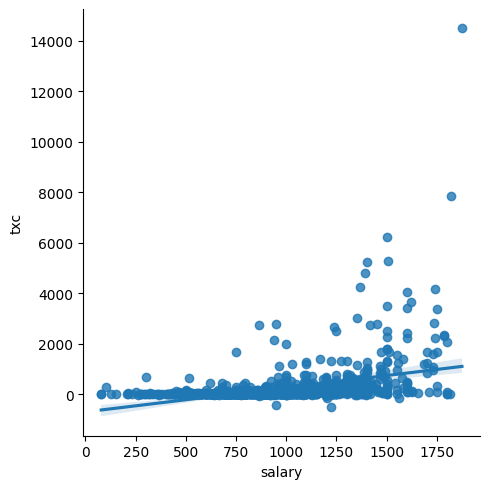

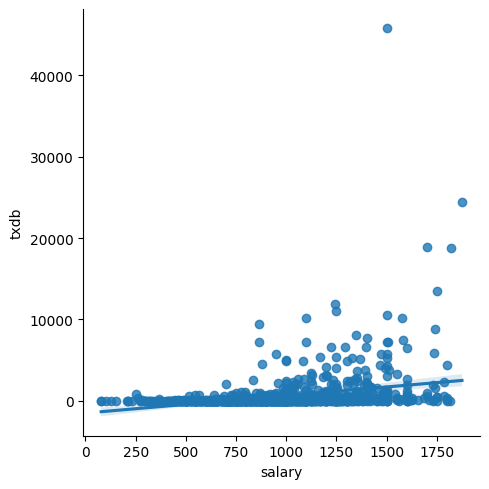

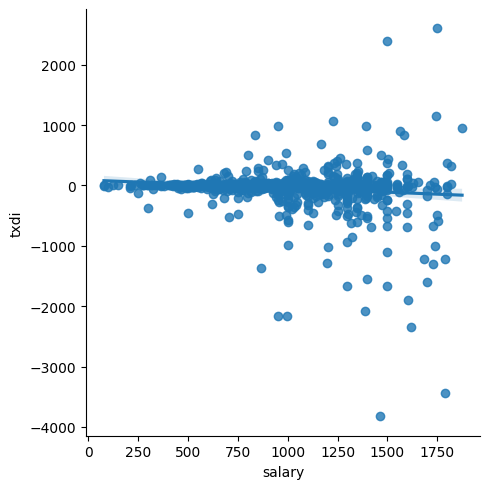

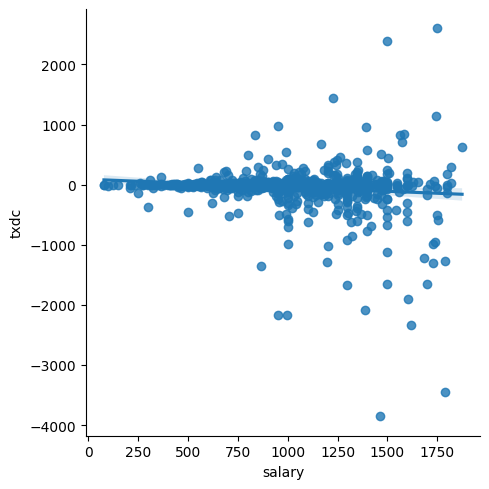

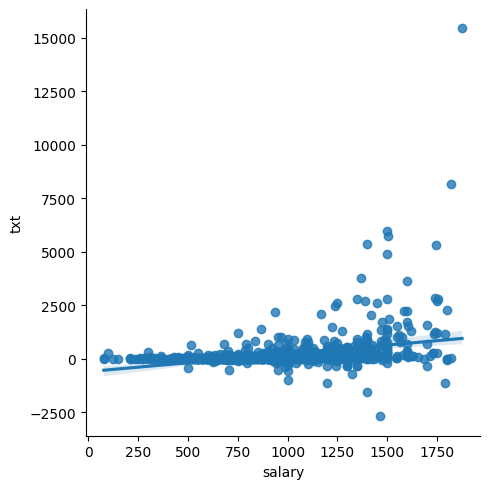

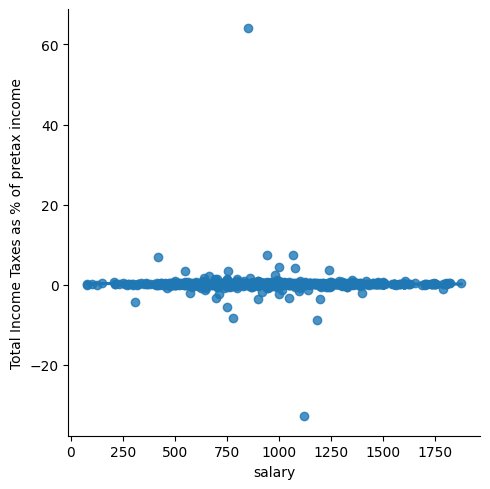

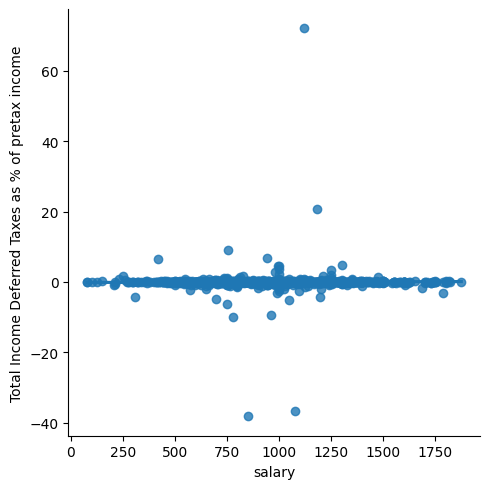

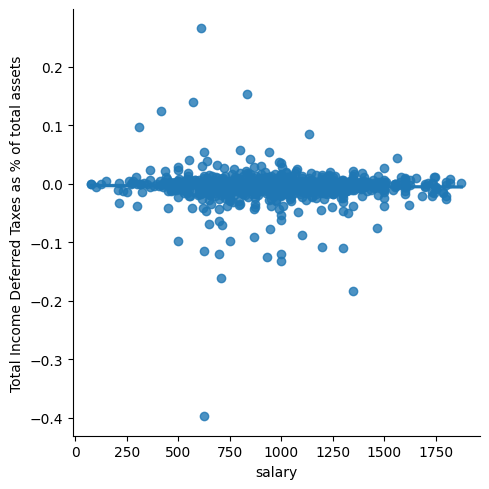

In [185]:
sns.lmplot(x="salary", y="revt", data=baseSalaryData)
sns.lmplot(x="salary", y="txc", data=baseSalaryData)
sns.lmplot(x="salary", y="txdb", data=baseSalaryData)
sns.lmplot(x="salary", y="txdi", data=baseSalaryData)
sns.lmplot(x="salary", y="txdc", data=baseSalaryData)
sns.lmplot(x="salary", y="txt", data=baseSalaryData)
sns.lmplot(x="salary", y="Total Income Taxes as % of pretax income", data=baseSalaryData)
sns.lmplot(x="salary", y="Total Income Deferred Taxes as % of pretax income", data=baseSalaryData)
sns.lmplot(x="salary", y="Total Income Deferred Taxes as % of total assets", data=baseSalaryData)

Finally, I fit a linear regression model to each pairing of columns in order to calculate the r-squared score for each pairing. The largest r-squared score should in theory show the most correlation between columns.

In [186]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

results = []

X = np.array(baseSalaryData["salary"])
X = X.reshape(-1, 1)
model = LinearRegression()
X

array([[1050. ],
       [1125. ],
       [1200. ],
       ...,
       [ 442. ],
       [ 650. ],
       [ 980.5]])

In [187]:
y = np.array(baseSalaryData["revt"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "revt"))

0.12461686929747329


In [188]:
y = np.array(baseSalaryData["txc"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "txc"))

0.1568524952737399


In [189]:
y = np.array(baseSalaryData["txdb"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "txdb"))

0.09116664022036958


In [190]:
y = np.array(baseSalaryData["txdi"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "txdi"))

0.01740459101948999


In [191]:
y = np.array(baseSalaryData["txdc"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "txdc"))

0.01740854309808515


In [192]:
y = np.array(baseSalaryData["txt"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "txt"))

0.11646117014078305


In [193]:
y = np.array(baseSalaryData["Total Income Taxes as % of pretax income"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "Total Income Taxes as % of pretax income"))

9.34435642239162e-05


In [194]:
y = np.array(baseSalaryData["Total Income Deferred Taxes as % of pretax income"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "Total Income Deferred Taxes as % of pretax income"))

0.0002441507254928865


In [195]:
y = np.array(baseSalaryData["Total Income Deferred Taxes as % of total assets"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "Total Income Deferred Taxes as % of total assets"))

0.00029573113504521853


In [196]:
max = results[0]

for result in results:
  if result[0] > max[0]:
    max = result

print("Maximum r^2 score:", max)

Maximum r^2 score: (0.1568524952737399, 'txc')


The resulting maximum r-squared score of ~0.157 indicates that while salary is most-closely correlated with txc, there is not a strong correlation. As such, salary appears to have very little impact on company tax factors such as effective tax rate and deferred tax percentage.